In [1]:
%matplotlib inline

import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

In [2]:
data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age has missing values. The count variable shows that 177 values are missing in the Age column.
One solution is to replace the null values with the median age which is more robust to outliers than the mean.

In [4]:
data['Age'].fillna(data['Age'].median(), inplace=True)

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


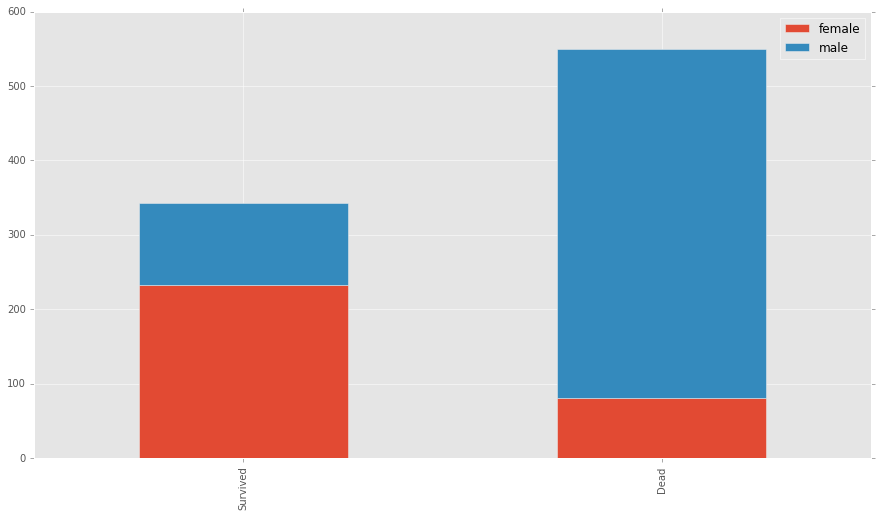

In [5]:
# Gender and survivial

survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

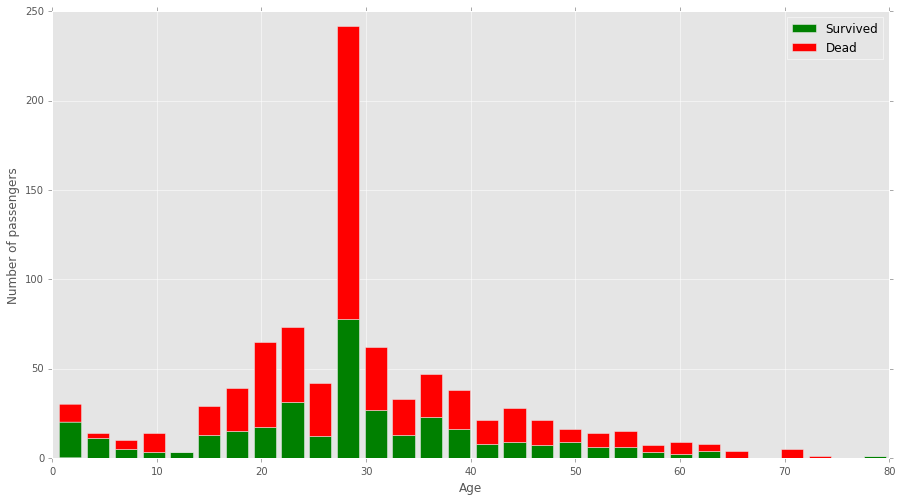

In [6]:
# Age and survival

figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

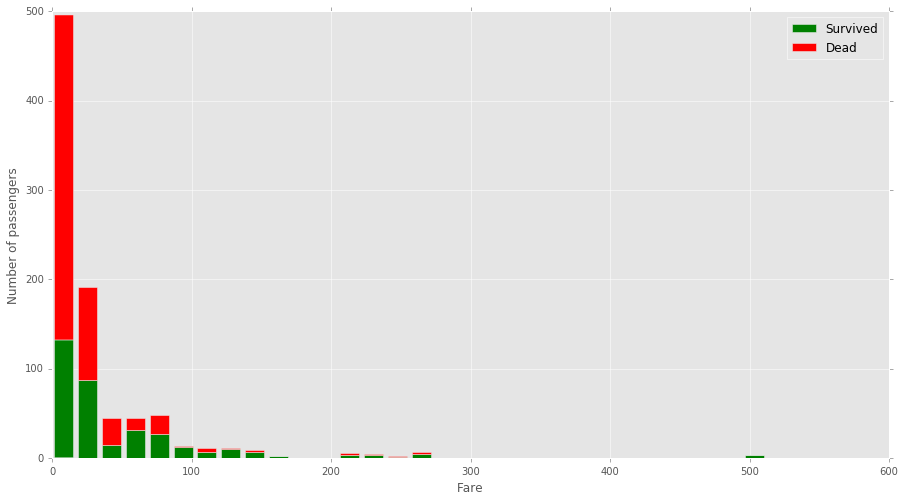

In [7]:
# Fare ticket and survival

figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Cheap ticket holder tend to die :D. 

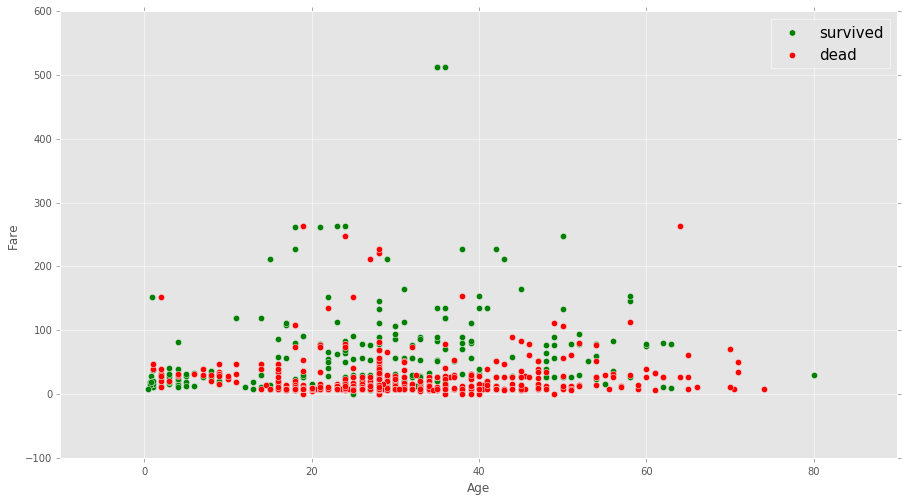

In [8]:
# Combine all the factor above: age, the fare and the survival

plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

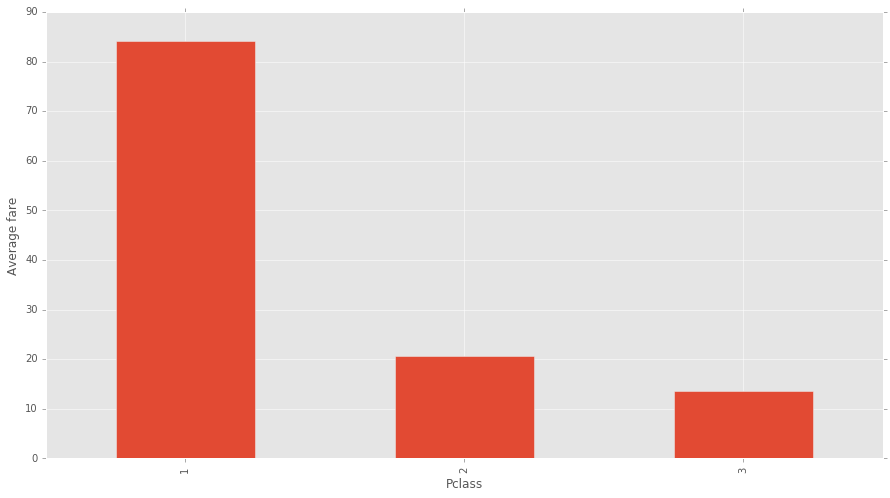

In [9]:
# In fact, the ticket fare correlates with the class as we see it in the chart below.

ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

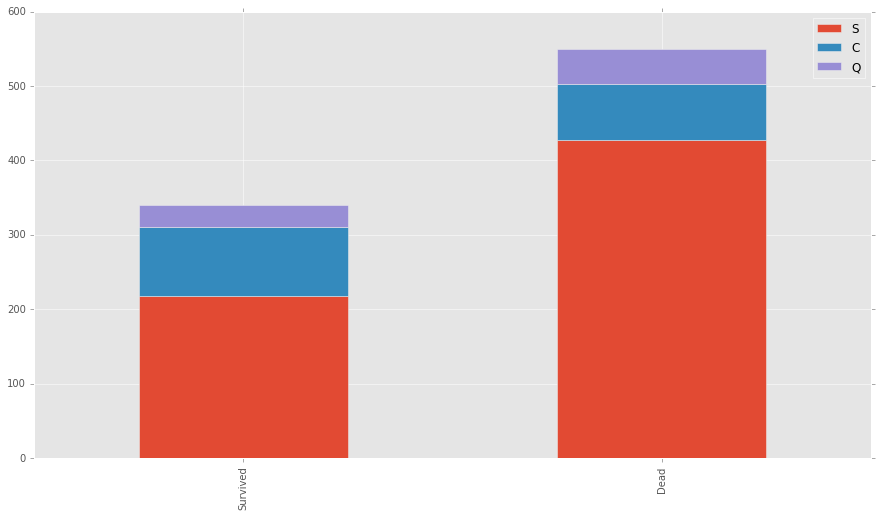

In [10]:
# Embark and survival

survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

No distinction difference.

# Feature Engineering

Define some helper function

In [11]:
def status(feature):

    print 'Processing',feature,': ok'

Combine the 2 train and test sets

In [12]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [13]:
combined = get_combined_data()

combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,982.000000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
combined.shape

(1309, 11)

## Extracting the passenger titles¶

You will notice that each name has a title in it !

In [18]:
combined['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [21]:
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

In [23]:
get_titles()

AttributeError: 'NoneType' object has no attribute 'unique'

In [27]:
combined['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

Show the table again to see the new column "Title"

In [24]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [25]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

In [28]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')

In [29]:
process_age()

Processing age : ok
